<h2>
Haseeb Chaudhury, Animesh Deb, 
Sri Tarun Gulumuru, 
Al Shafian Bari
 <br/>
CSC 44800 final
</h2>

<hr/>

# Logistic Regession

#### Importing

In [52]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

#### Data

In [55]:
file_path = "training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-15", names=['Target', 'ID', 'Date', 'Flag', 'User', 'Text'])
df.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Insights

In [56]:
print("Target values:\n"+str(df['Target'].unique()))
print("\nTarget counts:\n"+str(df['Target'].value_counts()))
print("\nCount of null values per column:\n"+str(df.isnull().sum()))

Target values:
[0 4]

Target counts:
Target
0    800000
4    800000
Name: count, dtype: int64

Count of null values per column:
Target    0
ID        0
Date      0
Flag      0
User      0
Text      0
dtype: int64


In [57]:
X = df['Text'].values
Y = df['Target'].values

In [58]:
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [59]:
Y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

#### Training and Testing

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=32)

#### Vectorization

In [61]:
vect = CountVectorizer()
vect.fit(x_train)

X_train = vect.transform(x_train)
X_test = vect.transform(x_test)
#print(x_train[4])
#print(X_train[4])

In [62]:
print(X_train[0])

  (0, 56129)	1
  (0, 57447)	1
  (0, 126962)	1
  (0, 129411)	1
  (0, 132556)	1
  (0, 142883)	1
  (0, 226884)	1
  (0, 252021)	1
  (0, 256925)	1
  (0, 257741)	1
  (0, 257883)	1
  (0, 433510)	1
  (0, 455368)	1
  (0, 467486)	1
  (0, 486108)	1
  (0, 501574)	1
  (0, 517177)	1
  (0, 520059)	1
  (0, 528806)	1
  (0, 558368)	1
  (0, 562011)	1
  (0, 562867)	1
  (0, 566030)	1
  (0, 566811)	1


In [63]:
symbols = ",.!?/&-:;@'..."
"["+"\\".join(symbols)+"]"

s = x_train[0]
s = ' '.join(x for x in re.split("["+"\\".join(symbols)+"]", s) if x)

for x in s.split():
    if len(x) > 1:
        print(f"{x : <10}{vect.vocabulary_[x.lower()] : ^10}")

It          257883  
was         558368  
rainy       433510  
and         57447   
cloudy      129411  
in          252021  
the         517177  
Windy       566030  
City        126962  
today       528806  
amp         56129   
WF          562011  
customers   142883  
had         226884  
some        486108  
serious     467486  
SAD         455368  
issues      257741  
with        566811  
them        520059  
when        562867  
is          256925  
summer      501574  
coming      132556  


#### Modeling

In [64]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [65]:
score = classifier.score(X_test, y_test)
print(score)

0.800290625


In [66]:
unique = df['Target'].unique()
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = unique)

df_cm = pd.DataFrame(cm, index=unique, columns=unique)
df_cm

,0,4
0,126497,33824
4,30083,129596


#### Count Vectorization and Modeling

In [67]:
NB = make_pipeline(CountVectorizer(), LogisticRegression())
NB.fit(x_train, y_train)
score = NB.score(x_test, y_test)
print(score)

0.79830625


In [68]:
unique = df['Target'].unique()
y_pred = NB.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = unique)

df_cm = pd.DataFrame(cm, index=unique, columns=unique)
df_cm

,0,4
0,125633,34688
4,29854,129825


#### TF-IDF Vectorization and Modeling

In [69]:
NB = make_pipeline(TfidfVectorizer(), LogisticRegression())
NB.fit(x_train, y_train)
score = NB.score(x_test, y_test)
print(score)

unique = df['Target'].unique()
y_pred = NB.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = unique)

df_cm = pd.DataFrame(cm, index=unique, columns=unique)
df_cm

0.8025125


,0,4
0,127017,33304
4,29892,129787


<hr/>

# Naive Bayes

#### Importing

In [70]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

#### Data

In [71]:
file_path = "training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-15", names=['Target', 'ID', 'Date', 'Flag', 'User', 'Text'])
df.head()

,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Insights

In [72]:
targets = df['Target'].unique()
print("Target values:\n"+str(targets))
print("\nTarget counts:\n"+str(df['Target'].value_counts()))
print("\nCount of null values per column:\n"+str(df.isnull().sum()))

Target values:
[0 4]

Target counts:
Target
0    800000
4    800000
Name: count, dtype: int64

Count of null values per column:
Target    0
ID        0
Date      0
Flag      0
User      0
Text      0
dtype: int64


In [73]:
X = df['Text'].values
Y = df['Target'].values

In [74]:
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [75]:
Y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

#### Training and testing

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=32)

In [77]:
print(x_train[5])

@kgasso Jeez...  Not that it would have made it easier either way...


#### Count Vectorization & Modeling

In [78]:
NB = make_pipeline(CountVectorizer(), MultinomialNB())
NB.fit(x_train, y_train)
score = NB.score(x_test, y_test)
print(score)

0.780703125


In [79]:
unique = df['Target'].unique()
y_pred = NB.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = unique)

df_cm = pd.DataFrame(cm, index=unique, columns=unique)
df_cm

,0,4
0,131110,29211
4,40964,118715


In [80]:
vect = CountVectorizer()
vect.fit(x_train)

X_train = vect.transform(x_train)
X_test = vect.transform(x_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

unique = df['Target'].unique()
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = unique)

df_cm = pd.DataFrame(cm, index=unique, columns=unique)
df_cm

0.780703125


,0,4
0,131110,29211
4,40964,118715


#### TF-IDF Vectorization & Modeling

In [81]:
NB = make_pipeline(TfidfVectorizer(), MultinomialNB())
NB.fit(x_train, y_train)
score = NB.score(x_test, y_test)
print(score)

0.773678125


In [82]:
unique = df['Target'].unique()
y_pred = NB.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = unique)

df_cm = pd.DataFrame(cm, index=unique, columns=unique)
df_cm

,0,4
0,131229,29092
4,43331,116348


<hr/>

# TensorFlow Neural Network

In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [84]:


# Read the CSV file, providing the correct file path
file_path = "training.1600000.processed.noemoticon.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-15", names=['Target', 'ID', 'Date', 'Flag', 'User', 'Text'])

# Display the first few rows of the dataframe
df.head()


,Target,ID,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [85]:
data = df[["Text","Target"]]

In [86]:
data["Target"][data["Target"]==4]=1

In [87]:
data_pos = data[data["Target"]==1].iloc[:int(20000)]
data_neg = data[data["Target"]==0].iloc[:int(20000)]

In [88]:
data = pd.concat([data_pos, data_neg])

In [89]:
data["Text"]=data["Text"].str.lower()

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
stop = stopwords.words('english')

In [92]:
from nltk.corpus import stopwords

stop_words = set(stop)

def clean_words(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

data["Text"] = data["Text"].apply(lambda text: clean_words(text))
data["Text"].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [93]:
punctuations = string.punctuation

def clean_punc(text):
    return text.translate(str.maketrans('','', punctuations))

data["Text"] = data["Text"].apply(lambda text: clean_punc(text))
data["Text"].head()

800000                   love health4uandpets u guys r best
800001    im meeting one besties tonight cant wait  girl...
800002    darealsunisakim thanks twitter add sunisa got ...
800003    sick really cheap hurts much eat real food plu...
800004                       lovesbrooklyn2 effect everyone
Name: Text, dtype: object

In [94]:
def clean_repeats(text):
    return re.sub(r'(.)\1+', r'\1', text)

data["Text"] = data["Text"].apply(lambda text: clean_repeats(text))
data["Text"].head()

800000                   love health4uandpets u guys r best
800001    im meting one besties tonight cant wait girl talk
800002    darealsunisakim thanks twiter ad sunisa got me...
800003    sick realy cheap hurts much eat real fod plus ...
800004                         lovesbroklyn2 efect everyone
Name: Text, dtype: object

In [95]:
def clean_email(text):
    return re.sub('@[^\s]+',' ', text)

data["Text"] = data["Text"].apply(lambda text: clean_email(text))
data["Text"].head()

800000                   love health4uandpets u guys r best
800001    im meting one besties tonight cant wait girl talk
800002    darealsunisakim thanks twiter ad sunisa got me...
800003    sick realy cheap hurts much eat real fod plus ...
800004                         lovesbroklyn2 efect everyone
Name: Text, dtype: object

In [96]:
def clean_URLs(text):
    return re.sub('((www\.[^\s]+) | (https?://[^\s]+))','',text)

data["Text"] = data["Text"].apply(lambda text: clean_URLs(text))
data["Text"].head()

800000                   love health4uandpets u guys r best
800001    im meting one besties tonight cant wait girl talk
800002    darealsunisakim thanks twiter ad sunisa got me...
800003    sick realy cheap hurts much eat real fod plus ...
800004                         lovesbroklyn2 efect everyone
Name: Text, dtype: object

In [97]:
def clean_nums(text):
    return re.sub('[0-9]+','',text)

data["Text"] = data["Text"].apply(lambda text: clean_nums(text))
data["Text"].head()

800000                    love healthuandpets u guys r best
800001    im meting one besties tonight cant wait girl talk
800002    darealsunisakim thanks twiter ad sunisa got me...
800003    sick realy cheap hurts much eat real fod plus ...
800004                          lovesbroklyn efect everyone
Name: Text, dtype: object

#### Tokenization

In [98]:
token = RegexpTokenizer(r'\w+')
data["Text"] = data["Text"].apply(token.tokenize)
data["Text"].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meting, one, besties, tonight, cant, wait...
800002    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800003    [sick, realy, cheap, hurts, much, eat, real, f...
800004                      [lovesbroklyn, efect, everyone]
Name: Text, dtype: object

#### Stemming

In [99]:
st = nltk.PorterStemmer()

def stemming(text):
    return [st.stem(word) for word in text]

data["Text"] = data["Text"].apply(lambda text: stemming(text))
data["Text"].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, mete, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twiter, ad, sunisa, g...
800003    [sick, reali, cheap, hurt, much, eat, real, fo...
800004                       [lovesbroklyn, efect, everyon]
Name: Text, dtype: object

#### Lemmatization

In [100]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()

def lemmatizing(text):
    return [lm.lemmatize(word) for word in text]

data["Text"] = data["Text"].apply(lambda text: lemmatizing(text))
data["Text"].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


800000               [love, healthuandpet, u, guy, r, best]
800001    [im, mete, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twiter, ad, sunisa, g...
800003    [sick, reali, cheap, hurt, much, eat, real, fo...
800004                       [lovesbroklyn, efect, everyon]
Name: Text, dtype: object

#### Modeling

In [101]:
X = data["Text"]
y = data["Target"]

In [102]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.20, random_state=2)

In [104]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer)
    return model

In [105]:
model = tensorflow_based_model() # here we are calling the function of created model

In [106]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [107]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)

Epoch 1/6
360/360 [==============================] - 125s 337ms/step - loss: 0.6005 - accuracy: 0.6636 - val_loss: 0.5399 - val_accuracy: 0.7266
Epoch 2/6
360/360 [==============================] - 110s 304ms/step - loss: 0.5086 - accuracy: 0.7548 - val_loss: 0.5266 - val_accuracy: 0.7328
Epoch 3/6
360/360 [==============================] - 116s 323ms/step - loss: 0.5033 - accuracy: 0.7577 - val_loss: 0.5221 - val_accuracy: 0.7372
Epoch 4/6
360/360 [==============================] - 128s 355ms/step - loss: 0.4823 - accuracy: 0.7708 - val_loss: 0.5262 - val_accuracy: 0.7422
Epoch 5/6
360/360 [==============================] - 131s 365ms/step - loss: 0.4723 - accuracy: 0.7761 - val_loss: 0.5416 - val_accuracy: 0.7419
Epoch 6/6
360/360 [==============================] - 130s 361ms/step - loss: 0.4584 - accuracy: 0.7833 - val_loss: 0.5393 - val_accuracy: 0.7375


In [108]:
accr1 = model.evaluate(X_test,Y_test)

250/250 [==============================] - 14s 54ms/step - loss: 0.5266 - accuracy: 0.7458


In [109]:
print(accr1[1])

0.7457500100135803


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline


In [3]:
# Read the CSV file
file_path = "training.1600000.processed.noemoticon.csv"
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-15", names=['Target', 'ID', 'Date', 'Flag', 'User', 'Text'])
except Exception as e:
    print(f"Error reading CSV file: {e}")
    raise

In [4]:
# Use only the first 10 rows
df_subset = df.sample(n=10, random_state=42).copy()

In [5]:
# Split the data into features (X) and target (y)
X_subset = df_subset['Text']
y_subset = df_subset['Target']

In [6]:
# Split the data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [7]:
# Create a pipeline with a TF-IDF vectorizer and a Decision Tree classifier
model_subset = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(random_state=42))

In [8]:
# Fit the model on the training data
model_subset.fit(X_train_subset, y_train_subset)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [9]:
# Make predictions on the test data
y_pred_subset = model_subset.predict(X_test_subset)

In [10]:
# Evaluate the accuracy of the model
accuracy_subset = accuracy_score(y_test_subset, y_pred_subset)
print(f"Accuracy on subset: {accuracy_subset * 100:.2f}%")

Accuracy on subset: 100.00%


In [11]:
# Display the confusion matrix
conf_matrix_subset = confusion_matrix(y_test_subset, y_pred_subset)
print("Confusion Matrix on subset:")
print(conf_matrix_subset)

Confusion Matrix on subset:
[[2]]


In [12]:
# Display the first 10 rows along with predictions
df_subset['Predicted'] = model_subset.predict(X_subset)
print(df_subset[['Text', 'Target', 'Predicted']])

                                                      Text  Target  Predicted
541200              @chrishasboobs AHHH I HOPE YOUR OK!!!        0          0
750      @misstoriblack cool , i have no tweet apps  fo...       0          0
766711   @TiannaChaos i know  just family drama. its la...       0          0
285055   School email won't open  and I have geography ...       0          0
705995                              upper airways problem        0          0
379611          Going to miss Pastor's sermon on Faith...        0          0
1189018            on lunch....dj should come eat with me        4          4
667030    @piginthepoke oh why are you feeling like that?        0          0
93541      gahh noo!peyton needs to live!this is horrible        0          0
1097326  @mrstessyman thank you glad you like it! There...       4          4


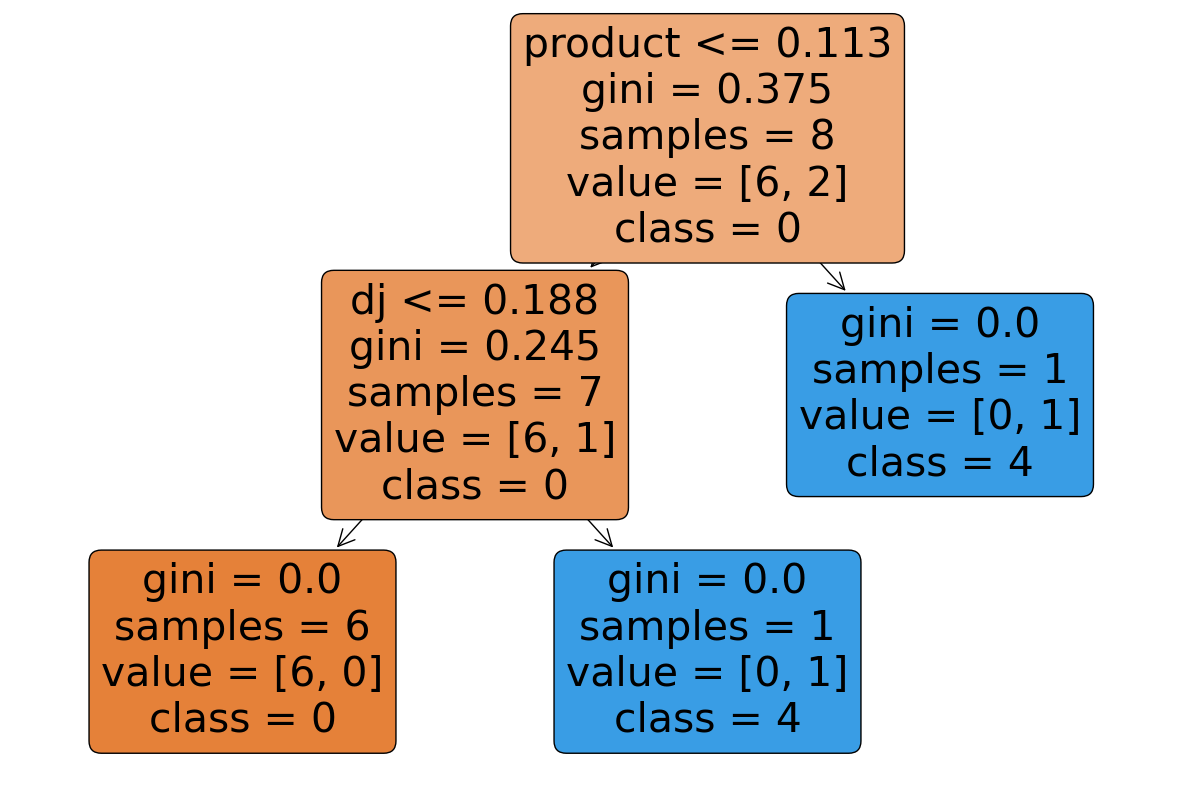

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

feature_names_list = model_subset.named_steps['tfidfvectorizer'].get_feature_names_out().tolist()

plt.figure(figsize=(15, 10))
plot_tree(model_subset.named_steps['decisiontreeclassifier'], feature_names=feature_names_list, class_names=['0', '4'], filled=True, rounded=True)
plt.show()
